<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [13]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


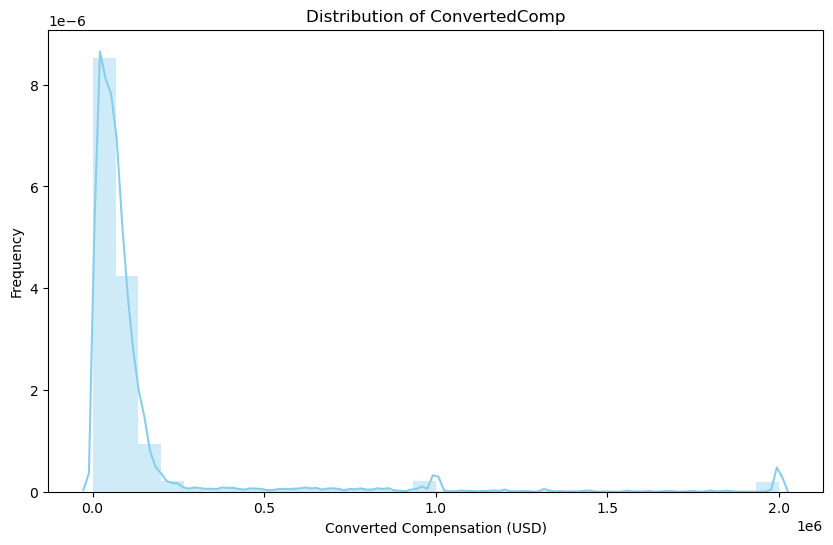

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(df['ConvertedComp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


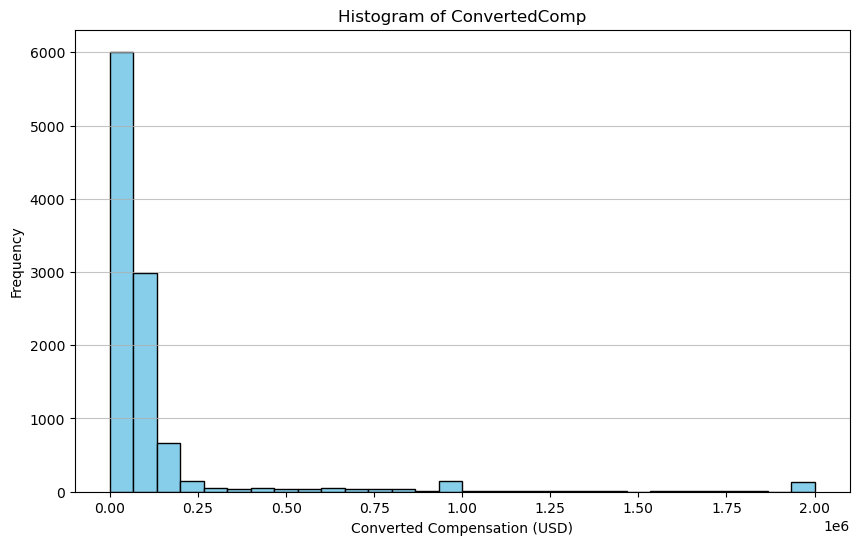

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


What is the median of the column `ConvertedComp`?


In [16]:
median_converted_comp = df['ConvertedComp'].median()

print(f'The median of ConvertedComp is: {median_converted_comp}')


The median of ConvertedComp is: 57745.0


How many responders identified themselves only as a **Man**?


In [17]:
man_count = df[df['Gender'] == 'Man'].shape[0]

print(f'The number of responders who identified as only "Man" is: {man_count}')

The number of responders who identified as only "Man" is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
woman_data = df[df['Gender'] == 'Woman']
median_converted_comp_woman = woman_data['ConvertedComp'].median()
print(f'The median ConvertedComp for responders identified as "Woman" is: {median_converted_comp_woman}')


The median ConvertedComp for responders identified as "Woman" is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

print(f'Minimum Age: {min_age}')
print(f'First Quartile (Q1): {q1_age}')
print(f'Median Age (Q2): {median_age}')
print(f'Third Quartile (Q3): {q3_age}')
print(f'Maximum Age: {max_age}')


Minimum Age: 16.0
First Quartile (Q1): 25.0
Median Age (Q2): 29.0
Third Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


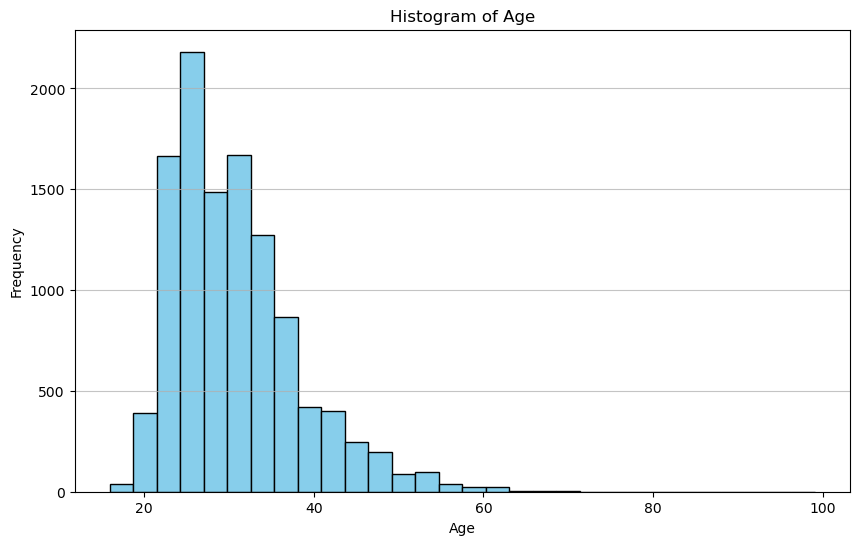

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


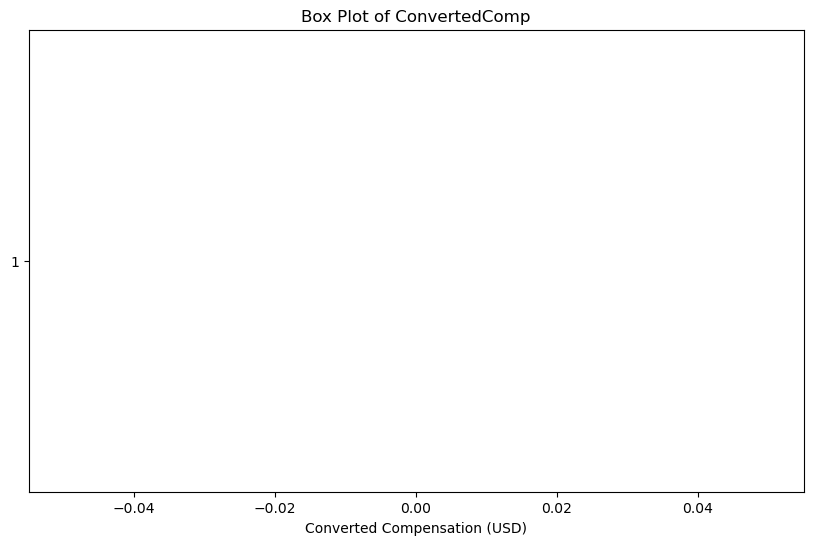

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, patch_artist=True)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.show()


In [26]:
median_converted_comp_before = df['ConvertedComp'].median()

print(f'The median ConvertedComp before removing outliers is: {median_converted_comp_before}')

The median ConvertedComp before removing outliers is: 57745.0


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print(f'The Interquartile Range (IQR) for ConvertedComp is: {iqr}')


The Interquartile Range (IQR) for ConvertedComp is: 73132.0


Find out the upper and lower bounds.


In [23]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f'The Upper Bound for potential outliers is: {upper_bound}')
print(f'The Lower Bound for potential outliers is: {lower_bound}')


The Upper Bound for potential outliers is: 209698.0
The Lower Bound for potential outliers is: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

print(f'The number of outliers in the ConvertedComp column is: {num_outliers}')


The number of outliers in the ConvertedComp column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
# Create a new DataFrame by removing outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame without outliers
print(df_no_outliers)


       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

In [27]:
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

print(f'The median ConvertedComp after removing outliers is: {median_converted_comp_after}')

The median ConvertedComp after removing outliers is: 52704.0


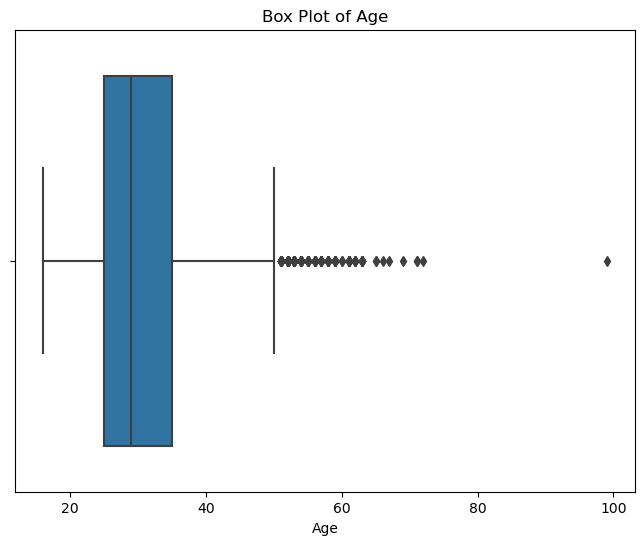

The number of outliers below Q1 for the Age column is: 2096


In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Identify outliers below Q1
q1 = df['Age'].quantile(0.25)
outliers_below_q1 = df[df['Age'] < q1]

# Count the number of outliers below Q1
num_outliers_below_q1 = outliers_below_q1.shape[0]

print(f'The number of outliers below Q1 for the Age column is: {num_outliers_below_q1}')

In [29]:
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print(f'The mean ConvertedComp after removing outliers is: {mean_converted_comp_after}')

The mean ConvertedComp after removing outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [30]:
# Select numerical columns in the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Extract the correlation values for 'Age' column
correlation_with_age = correlation_matrix['Age']

print('Correlation between Age and other numerical columns:')
print(correlation_with_age)


Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [31]:
highest_correlation_column = correlation_with_age.abs().idxmax()

print(f'The column with the highest correlation with "Age" is: {highest_correlation_column}')

The column with the highest correlation with "Age" is: Age


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
